In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from matplotlib.colors import LogNorm
import numpy as np
from copy import deepcopy

In [3]:
datadir = 'data/linear'

ewc_dir = os.path.join(datadir, 'linear_ewc')
csvs = [f for f in os.listdir(ewc_dir) if f.endswith('.csv')]
dfs = [pd.read_csv(os.path.join(ewc_dir, f)) for f in csvs]
ewc_df = pd.concat(dfs)

# load csv files for gradient_decomposition data
gradient_decomposition_dir = os.path.join(datadir, 'gradient_decomposition')   
csvs = [f for f in os.listdir(gradient_decomposition_dir) if f.endswith('.csv')]
dfs = [pd.read_csv(os.path.join(gradient_decomposition_dir, f)) for f in csvs]
df_gd = pd.concat(dfs)
# sort on lambda filter and lambda_anti_filter
df_gd = df_gd.sort_values(by=['lambda_filter', 'lambda_anti_filter'])

# use entire dataset to get norm for cmaps
df_combined = pd.concat([ewc_df, df_gd])
norm = plt.Normalize(vmin=df_combined['stability'].min(), vmax=df_combined['stability'].max())


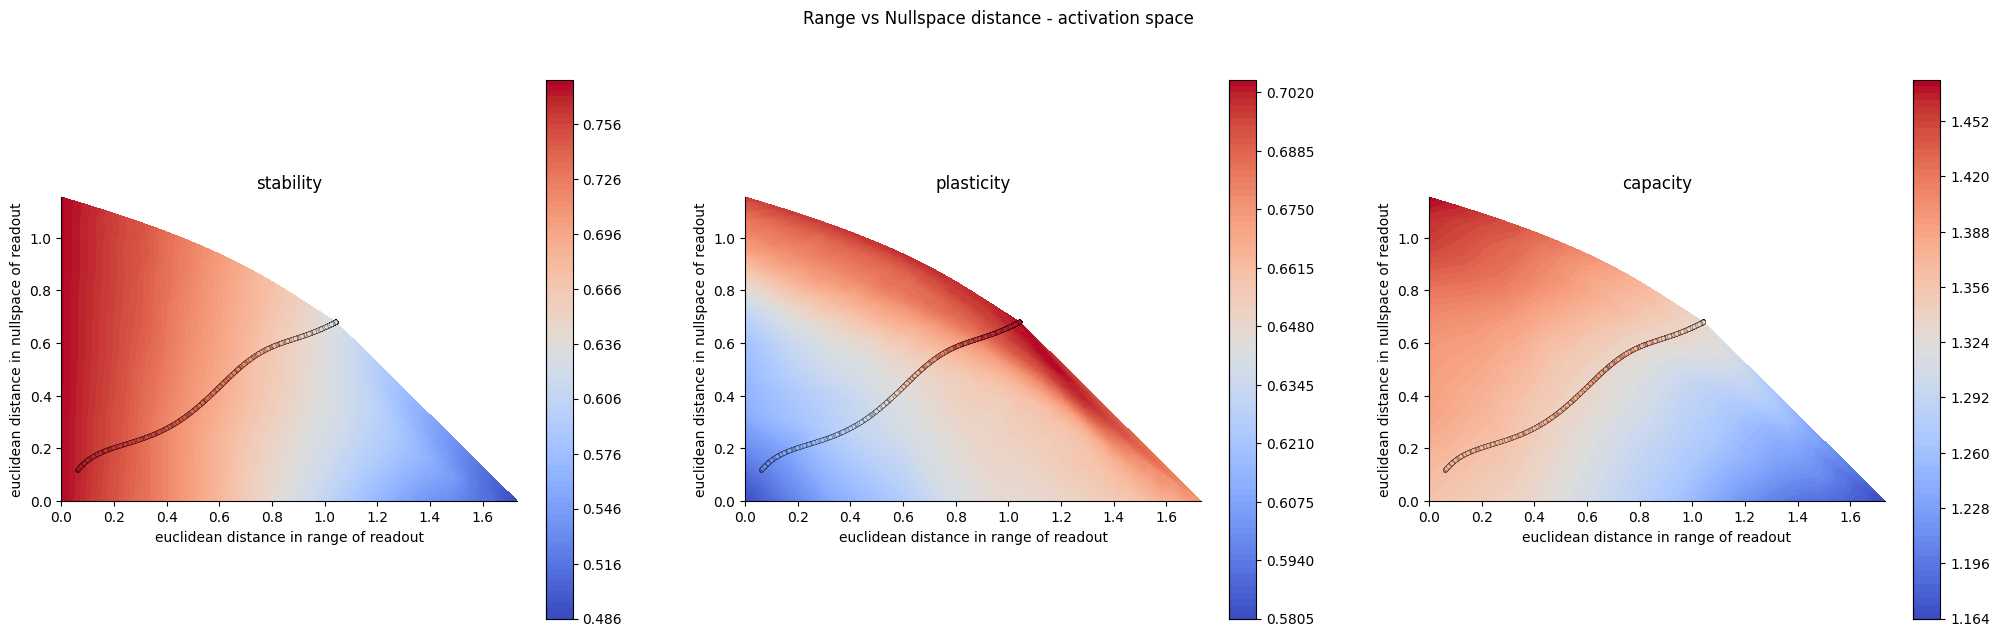

In [4]:
norm = plt.Normalize(vmin=df_combined['stability'].min(), vmax=df_combined['stability'].max())

plt.figure(figsize=(25,7))
plt.subplot(1,3,1)
plt.tricontourf(df_gd['p2_embedding_range'], df_gd['p2_embedding_null'], df_gd['stability'], cmap='coolwarm', levels=100, origin='upper', norm=norm)
plt.colorbar()
plt.xlabel('euclidean distance in range of readout')
plt.ylabel('euclidean distance in nullspace of readout')

# on top of that, plot p2 range vs p2 nullspace distance method is ewc, as a scatterplot
# small markers, with light gray border

plt.scatter(ewc_df['p2_embedding_range'],
            ewc_df['p2_embedding_null'],
            c=ewc_df['stability'],
            cmap='coolwarm',
            norm=norm,
            s=10,
            edgecolors='k',
            linewidths=0.2)


plt.xlabel('euclidean distance in range of readout')
plt.ylabel('euclidean distance in nullspace of readout')
plt.title('stability')
sns.despine()
plt.gca().set_aspect('equal', adjustable='box')


plt.subplot(1,3,2)
norm = plt.Normalize(vmin=df_combined['plasticity'].min(), vmax=df_combined['plasticity'].max())
plt.tricontourf(df_gd['p2_embedding_range'], df_gd['p2_embedding_null'], df_gd['plasticity'], cmap='coolwarm', levels=100, origin='upper', norm=norm)
plt.colorbar()
plt.xlabel('euclidean distance in range of readout')
plt.ylabel('euclidean distance in nullspace of readout')

# on top of that, plot p2 range vs p2 nullspace distance method is ewc, as a scatterplot
# small markers, with light gray border

plt.scatter(ewc_df['p2_embedding_range'],
            ewc_df['p2_embedding_null'],
            c=ewc_df['plasticity'],
            cmap='coolwarm',
            norm=norm,
            s=10,
            edgecolors='k',
            linewidths=0.2)

plt.xlabel('euclidean distance in range of readout')
plt.ylabel('euclidean distance in nullspace of readout')
plt.title('plasticity')
plt.gca().set_aspect('equal', adjustable='box')

plt.subplot(1,3,3)
df_combined['capacity'] = df_combined['plasticity'] + df_combined['stability']
norm = plt.Normalize(vmin=df_combined['capacity'].min(), vmax=df_combined['capacity'].max())

df_gd['capacity'] = df_gd['plasticity'] + df_gd['stability']
ewc_df['capacity'] = ewc_df['plasticity'] + ewc_df['stability']
plt.tricontourf(df_gd['p2_embedding_range'], df_gd['p2_embedding_null'], df_gd['capacity'], cmap='coolwarm', levels=100, origin='upper', norm=norm)
plt.colorbar()
plt.xlabel('euclidean distance in range of readout')
plt.ylabel('euclidean distance in nullspace of readout')
plt.title('Range vs Nullspace distance - Gradient Decomposition')

# on top of that, plot p2 range vs p2 nullspace distance method is ewc, as a scatterplot
# small markers, with light gray border

plt.scatter(ewc_df['p2_embedding_range'],
            ewc_df['p2_embedding_null'],
            c=ewc_df['capacity'],
            cmap='coolwarm',
            norm=norm,
            s=10,
            edgecolors='k',
            linewidths=0.2)

plt.xlabel('euclidean distance in range of readout')
plt.ylabel('euclidean distance in nullspace of readout')
plt.title('capacity')
sns.despine()
plt.gca().set_aspect('equal', adjustable='box')

plt.suptitle('Range vs Nullspace distance - activation space')
sns.despine()
plt.gca().set_aspect('equal', adjustable='box')

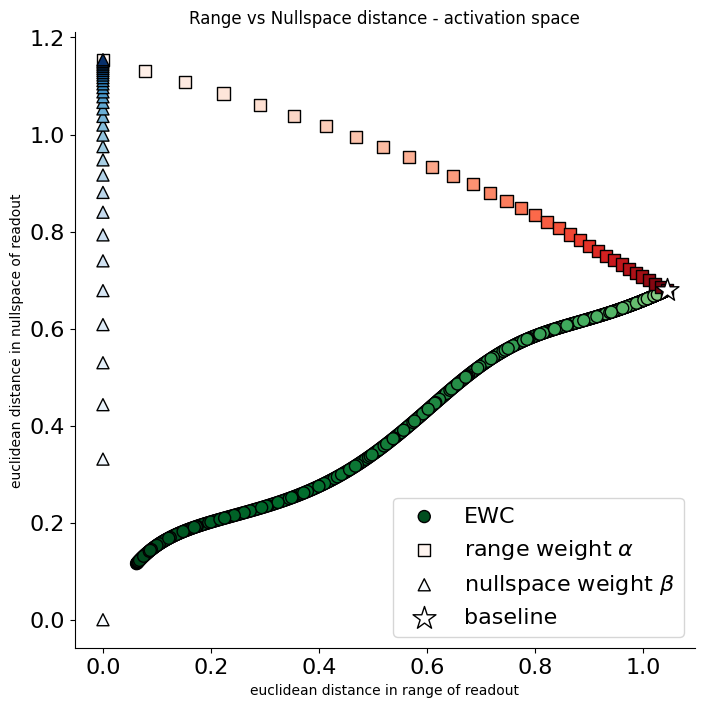

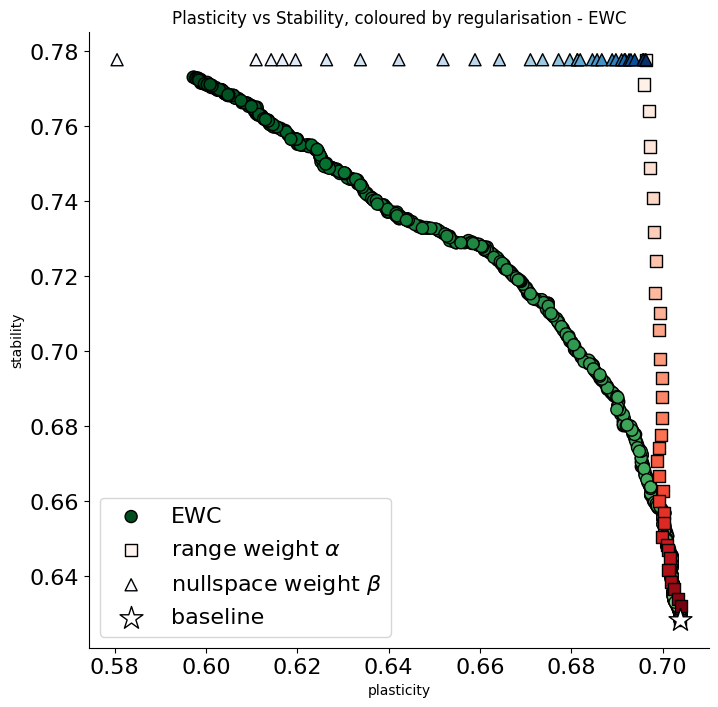

In [32]:
MARKERSIZE = 75
LINE = 1.

# same plot again but colour each line by its parameter strength and use three different colour gradient cmaps
df_gd_nullspace = df_gd[df_gd['lambda_anti_filter'] == 0.]
df_gd_range = df_gd[df_gd['lambda_filter'] == 1.]

# sort ewc values
ewc_lambdas = ewc_df['lambda_ewc'].unique()
ewc_lambdas.sort()

ewc_norm_min, ewc_norm_max = ewc_lambdas[1], ewc_lambdas[-1]
log_norm_ewc = matplotlib.colors.LogNorm(vmin=ewc_norm_min, vmax=ewc_norm_max)



fig_activations = plt.figure(figsize=(8, 8))
plt.scatter(ewc_df['p2_embedding_range'],
            ewc_df['p2_embedding_null'],
            c=ewc_df['lambda_ewc'],
            cmap = 'Greens',
            norm=log_norm_ewc,
            s=MARKERSIZE,
            marker='o',
            edgecolors='k',
            linewidths=LINE,
            label='EWC'
            )

plt.scatter(df_gd_range['p2_embedding_range'],
            df_gd_range['p2_embedding_null'],
            c=df_gd_range['lambda_anti_filter'],
            cmap='Reds',
            s=MARKERSIZE,
            marker='s',
            edgecolors='k',
            linewidths=LINE,
            label=r'range weight $\alpha$'
            )

# plt.colorbar()
plt.scatter(df_gd_nullspace['p2_embedding_range'],
            df_gd_nullspace['p2_embedding_null'],
            c=df_gd_nullspace['lambda_filter'],
            cmap='Blues',
            s=MARKERSIZE,
            marker='^',
            edgecolors='k',
            linewidths=LINE,
            label=r'nullspace weight $\beta$'
            )

# mark the baseline condition where alpha = 1, beta = 1 with a star
plt.scatter(
    df_gd_range[df_gd_range['lambda_anti_filter'] == 1.]['p2_embedding_range'],
    df_gd_range[df_gd_range['lambda_anti_filter'] == 1.]['p2_embedding_null'],
    s=300,
    marker='*',
    edgecolors='k',
    linewidths=LINE,
    facecolors='white',
    label='baseline'
)

plt.xlabel('euclidean distance in range of readout')
plt.ylabel('euclidean distance in nullspace of readout')
plt.title('Range vs Nullspace distance - activation space')
# increase size of tick font
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
sns.despine()
plt.legend(fontsize=16)


# plot plasticity vs stability for the same data

# get all rows where lambda_anti_filter = 0
df_gd_nullspace = df_gd[df_gd['lambda_anti_filter'] == 0.]


fig_stability_plasticity = plt.figure(figsize=(8, 8))
plt.scatter(
            ewc_df['plasticity'],
            ewc_df['stability'],
            c=ewc_df['lambda_ewc'],
            cmap='Greens',
            norm=log_norm_ewc,
            s=MARKERSIZE,
            marker='o',
            edgecolors='k',
            linewidths=LINE,
            label='EWC'
            )

plt.scatter(df_gd_range['plasticity'],
            df_gd_range['stability'],
            c=df_gd_range['lambda_anti_filter'],
            cmap='Reds',
            s=MARKERSIZE,
            marker='s',
            edgecolors='k',
            linewidths=LINE,
            label=r'range weight $\alpha$'
            )

plt.scatter(df_gd_nullspace['plasticity'],
            df_gd_nullspace['stability'],
            c=df_gd_nullspace['lambda_filter'],
            cmap='Blues',
            s=MARKERSIZE,
            marker='^',
            edgecolors='k',
            linewidths=LINE,
            label=r'nullspace weight $\beta$'
            )

# mark the baseline condition where alpha = 1, beta = 1 with a star
plt.scatter(
    df_gd_range[df_gd_range['lambda_anti_filter'] == 1.]['plasticity'],
    df_gd_range[df_gd_range['lambda_anti_filter'] == 1.]['stability'],
    s=300,
    marker='*',
    edgecolors='k',
    linewidths=LINE,
    facecolors='white',
    label='baseline'
)

sns.despine()
plt.xlabel('plasticity')
plt.ylabel('stability')
plt.title('Plasticity vs Stability, coloured by regularisation - EWC')

# equal scaling
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# add legend and set its fontsize
plt.legend(fontsize=16)
sns.despine()

# save both
# ensure folder exists
if not os.path.exists('plots/linear'):
    os.makedirs('plots/linear')
fig_activations.savefig('plots/linear/activation_change.png')
fig_stability_plasticity.savefig('plots/linear/stability_plasticity.png')


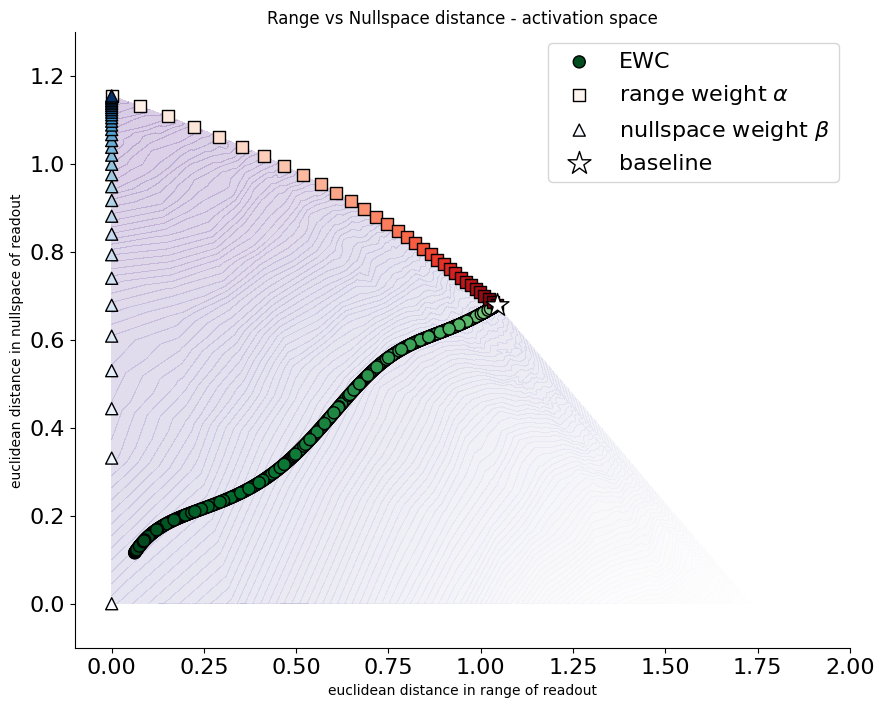

In [33]:
MARKERSIZE = 75
LINE = 1.

# same plot again but colour each line by its parameter strength and use three different colour gradient cmaps
df_gd_nullspace = df_gd[df_gd['lambda_anti_filter'] == 0.]
df_gd_range = df_gd[df_gd['lambda_filter'] == 1.]

# sort ewc values
ewc_lambdas = ewc_df['lambda_ewc'].unique()
ewc_lambdas.sort()

ewc_norm_min, ewc_norm_max = ewc_lambdas[1], ewc_lambdas[-1]
log_norm_ewc = matplotlib.colors.LogNorm(vmin=ewc_norm_min, vmax=ewc_norm_max)



fig_activations = plt.figure(figsize=(10, 8))

# plot stability + plasticity as a contour plot in the background
plt.tricontourf(df_gd['p2_embedding_range'], df_gd['p2_embedding_null'], df_gd['capacity'], cmap='Purples', origin='upper', norm=norm, alpha=.2, levels=150)

plt.scatter(ewc_df['p2_embedding_range'],
            ewc_df['p2_embedding_null'],
            c=ewc_df['lambda_ewc'],
            cmap = 'Greens',
            norm=log_norm_ewc,
            s=MARKERSIZE,
            marker='o',
            edgecolors='k',
            linewidths=LINE,
            label='EWC'
            )

plt.scatter(df_gd_range['p2_embedding_range'],
            df_gd_range['p2_embedding_null'],
            c=df_gd_range['lambda_anti_filter'],
            cmap='Reds',
            s=MARKERSIZE,
            marker='s',
            edgecolors='k',
            linewidths=LINE,
            label=r'range weight $\alpha$'
            )

# plt.colorbar()
plt.scatter(df_gd_nullspace['p2_embedding_range'],
            df_gd_nullspace['p2_embedding_null'],
            c=df_gd_nullspace['lambda_filter'],
            cmap='Blues',
            s=MARKERSIZE,
            marker='^',
            edgecolors='k',
            linewidths=LINE,
            label=r'nullspace weight $\beta$'
            )

# mark the baseline condition where alpha = 1, beta = 1 with a star
plt.scatter(
    df_gd_range[df_gd_range['lambda_anti_filter'] == 1.]['p2_embedding_range'],
    df_gd_range[df_gd_range['lambda_anti_filter'] == 1.]['p2_embedding_null'],
    s=300,
    marker='*',
    edgecolors='k',
    linewidths=LINE,
    facecolors='white',
    label='baseline'
)

plt.xlabel('euclidean distance in range of readout')
plt.ylabel('euclidean distance in nullspace of readout')
plt.title('Range vs Nullspace distance - activation space')
# increase size of tick font
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
sns.despine()
plt.legend(fontsize=16)
plt.xlim([-.1, 2.])
plt.ylim([-.1, 1.3])

plt.savefig('plots/linear/activation_change_contour.png')


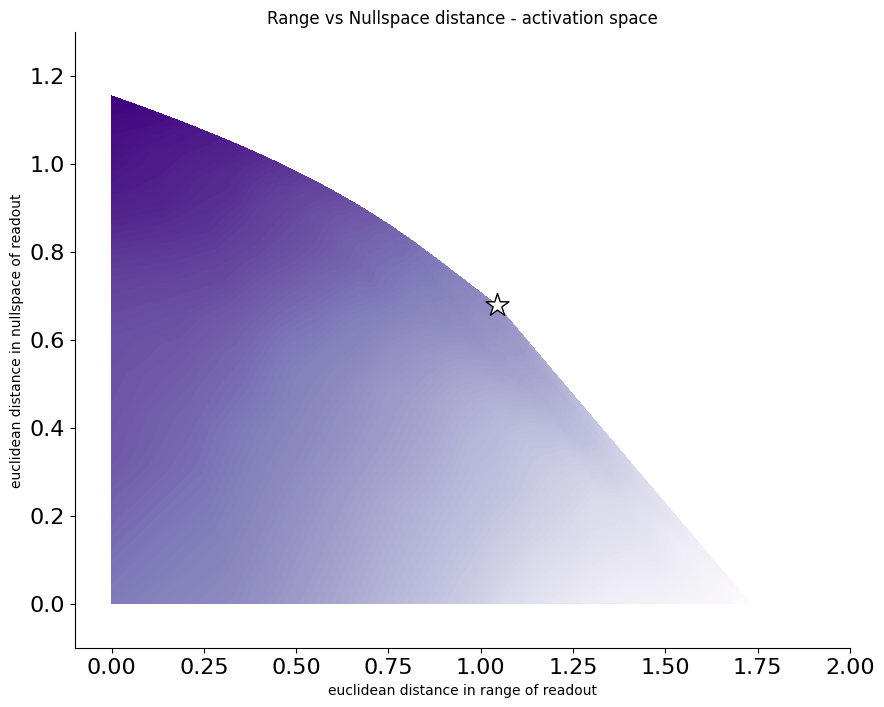

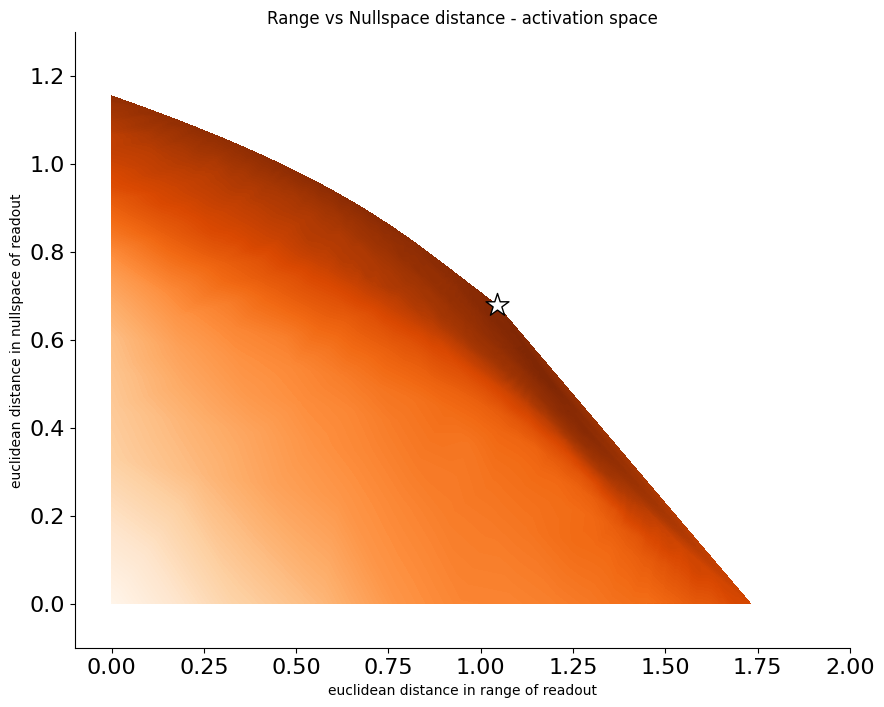

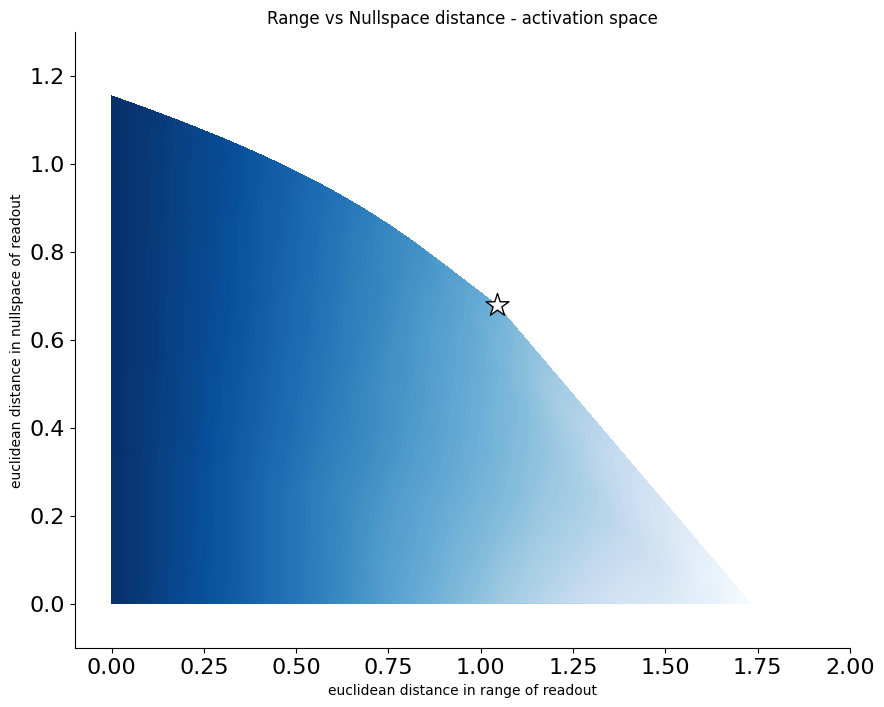

In [31]:
MARKERSIZE = 75
LINE = 1.

fig_activations = plt.figure(figsize=(10, 8))

# plot stability + plasticity as a contour plot in the background
plt.tricontourf(df_gd['p2_embedding_range'], df_gd['p2_embedding_null'], df_gd['capacity'], cmap='Purples', origin='upper', alpha=1., levels=150)

# mark the baseline condition where alpha = 1, beta = 1 with a star
plt.scatter(
    df_gd_range[df_gd_range['lambda_anti_filter'] == 1.]['p2_embedding_range'],
    df_gd_range[df_gd_range['lambda_anti_filter'] == 1.]['p2_embedding_null'],
    s=300,
    marker='*',
    edgecolors='k',
    linewidths=LINE,
    facecolors='white',
    label='baseline'
)

plt.xlabel('euclidean distance in range of readout')
plt.ylabel('euclidean distance in nullspace of readout')
plt.title('Range vs Nullspace distance - activation space')
# increase size of tick font
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
sns.despine()
plt.xlim([-.1, 2.])
plt.ylim([-.1, 1.3])

plt.savefig('plots/linear/activation_change_contour_stability_plasticity.png')

# repeat colour by plasticity

fig_activations = plt.figure(figsize=(10, 8))

# plot stability + plasticity as a contour plot in the background
plt.tricontourf(df_gd['p2_embedding_range'], df_gd['p2_embedding_null'], df_gd['plasticity'], cmap='Oranges', origin='upper', alpha=1, levels=150)

# mark the baseline condition where alpha = 1, beta = 1 with a star
plt.scatter(
    df_gd_range[df_gd_range['lambda_anti_filter'] == 1.]['p2_embedding_range'],
    df_gd_range[df_gd_range['lambda_anti_filter'] == 1.]['p2_embedding_null'],
    s=300,
    marker='*',
    edgecolors='k',
    linewidths=LINE,
    facecolors='white',
    label='baseline'
)

plt.xlabel('euclidean distance in range of readout')
plt.ylabel('euclidean distance in nullspace of readout')
plt.title('Range vs Nullspace distance - activation space')
# increase size of tick font
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
sns.despine()
plt.xlim([-.1, 2.])
plt.ylim([-.1, 1.3])

plt.savefig('plots/linear/activation_change_contour_plasticity.png')

# repeat colour by stability 

fig_activations = plt.figure(figsize=(10, 8))

# plot stability + plasticity as a contour plot in the background
plt.tricontourf(df_gd['p2_embedding_range'], df_gd['p2_embedding_null'], df_gd['stability'], cmap='Blues', origin='upper', alpha=1., levels=150)

# mark the baseline condition where alpha = 1, beta = 1 with a star
plt.scatter(
    df_gd_range[df_gd_range['lambda_anti_filter'] == 1.]['p2_embedding_range'],
    df_gd_range[df_gd_range['lambda_anti_filter'] == 1.]['p2_embedding_null'],
    s=300,
    marker='*',
    edgecolors='k',
    linewidths=LINE,
    facecolors='white',
    label='baseline'
)

plt.xlabel('euclidean distance in range of readout')
plt.ylabel('euclidean distance in nullspace of readout')
plt.title('Range vs Nullspace distance - activation space')
# increase size of tick font
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
sns.despine()
plt.xlim([-.1, 2.])
plt.ylim([-.1, 1.3])

plt.savefig('plots/linear/activation_change_contour_stability.png')
